In [276]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [314]:
data = pd.read_csv("/kaggle/input/spotify-data/dataset.csv")

# Рассмотрим как выглядят данные

In [315]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Сразу удалим столбец повторяющий индексацию

In [316]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [317]:
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Описание каждой колонки данных
 (Пояснения для описания можно прочитать в оффициальном апи spotify https://developer.spotify.com/documentation/web-api/reference/get-audio-features) Формулировки многих описаний для переменных взяты из документации. 

### **track_id** - Уникальный идентификатор для каждого трека
### **artists** - перечесление всех исполнителей песни. Исполнители разделеный символом ";"
### **album_name** - имя альбома
### **track_name** - имя трека
### **popularity** - целевая переменная с целочисленным зачением в промежутке от 0 до 100
### **duration_ms** - длительность трека в милисекундах
### **explicit** - бинарное значение, содержится ли контент не предназанченный для несовершеннолетних. 0 - если не содержит, 1 - если содержит.
### **danceability** - оценка того, насколько трек подходит для танцев (анализируется темп, стабильность ритма и другие характеристики). Действительное число от 0 до 1
### **energy** - оценка того, насколько трек энергичен. (Из доукентации spotify: "typically, energetic tracks feel fast, loud, and noisy."). Число от 0 до 1
### **key** - (из апи spotify: "Тональность, в которой находится трек. Целые числа сопоставляются с тонами с использованием стандартной нотации класса тональности . Например, 0 = C, 1 = C♯/D♭, 2 = D и т. д. Если тон не обнаружен, значение равно -1.")
### **loudness** - громкость в дицибелах. Вещесвенное число, чаще всего отрицательное
### **mode** - модальность трека. Мажор представлен 1, а минор — 0.
### **speechiness** - оценка того, насколько трек похож на речь. Вещественное число от 0 до 1. 1 наиболее близкие значения для аудио файлов наиболее похожих например на подкаст илир аудиокнигу.
### **acousticness** - Мера уверенности от 0,0 до 1,0 того, является ли трек акустическим. 1,0 представляет высокую уверенность в том, что трек является акустическим.
### **instrumentalness** - оценка того, насколько много в треке инстрментальных элементов. Тем ближе к 0, чем больше вокала
### **liveness** - присутствие аудитории при запистся (признак того насколько "живой" звук). Число от 0 до  1
### **valence** - оценка музыкальной позитивности трека. Число от 0 до  1
### **tempo** - Общий предполагаемый темп трека в ударах в минуту (BPM). В музыкальной терминологии темп — это скорость или темп данного произведения, который напрямую выводится из средней длительности удара.
### **time_signature** - Оценочный размер такта. Размер такта (метр) — это условное обозначение, указывающее, сколько долей содержится в каждом такте (или такте). Размер такта варьируется от 3 до 7, что указывает на размеры от «3/4» до «7/4».
### **track_genre** - жанр трека. Строка

In [318]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [319]:
data.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [320]:
data.dropna(inplace=True)

# Track_id

### id трека не является уникальным в таблице. Более 20000 записей с совпадающим id

In [321]:
track_ids = data["track_id"].unique()
len(track_ids)

89740

In [322]:
len(data)

113999

### Сначала удалим строки, у которых все значения совпадют (это более 400 строк)

In [323]:
data = data.drop_duplicates()

In [324]:
len(data)

113549

## Проверим какие колонки совпадают у треков с одинаковым id

In [288]:
trackid_to_tracks = {}
for i in tqdm(range(len(data))):
    track_id = data.iloc[i]["track_id"]
    if track_id in trackid_to_tracks:
        trackid_to_tracks[track_id].append(data.iloc[i])
    else:
        trackid_to_tracks[track_id] = [data.iloc[i]]

100%|██████████| 113549/113549 [00:16<00:00, 6989.73it/s]


In [289]:
not_similar_column_values_counter = {column_name: 0 for column_name in data.columns}
track_ids_with_similar_popularity = []
for track_id in tqdm(track_ids):
    tracks = pd.DataFrame(trackid_to_tracks[track_id])
    if len(tracks) == 1:
        continue
    for column_name in tracks.columns:
        column_values = tracks[column_name]
        if len(set(column_values)) != 1:
            if column_name == "popularity":
                track_ids_with_similar_popularity.append(track_id)
            not_similar_column_values_counter[column_name] += len(tracks)
            
        

100%|██████████| 89740/89740 [01:32<00:00, 969.79it/s] 


## У треков с одинаковым id чаще всего совпадает жанр. Таким образом в таблице представлены треки у которых много жанров
## Также у некоторых треков совпадает отличается popularity

In [290]:
not_similar_column_values_counter

{'track_id': 0,
 'artists': 0,
 'album_name': 0,
 'track_name': 0,
 'popularity': 1928,
 'duration_ms': 0,
 'explicit': 0,
 'danceability': 0,
 'energy': 0,
 'key': 0,
 'loudness': 0,
 'mode': 0,
 'speechiness': 0,
 'acousticness': 0,
 'instrumentalness': 0,
 'liveness': 0,
 'valence': 0,
 'tempo': 0,
 'time_signature': 0,
 'track_genre': 40108}

In [291]:
data_similar_popularity = data.query(f"track_id in {track_ids_with_similar_popularity}").sort_values("track_id")

In [292]:
aggregated_similar_popularity = data_similar_popularity.groupby("track_id")["popularity"].aggregate(lambda x: abs(x.max() - x.min()))
aggregated_similar_popularity

track_id
00YwP3wJWiG8IxAA7OS9lo    1
014SIjoLDG1Ku19c5FlDYh    3
02jLfqc9gMo8PkHEGHY3OT    1
03mHinvLdrdSTd7w4GPXwH    2
04IUJPcxiUuXih8eJIVzGz    1
                         ..
7w87IxuO7BDcJ3YUqCyMTT    1
7wEKVEEo4Vmn1qNvL7AZNf    1
7x2rua8HcHsaJV5ib1BQbu    1
7x7i3XBKSM4AoLoPymDuh9    1
7z1uUb32IxZvJ97Fk86igf    2
Name: popularity, Length: 720, dtype: int64

## На гистограмме представлен рапределения разницы popularity для тех треков, у которых id совпадает но отличается popularity. На гистограмме видно, что чаще всего значения отличаются всего на несколько едениц, и только в еденицчных случаях popularity отличается значительно.

<Axes: >

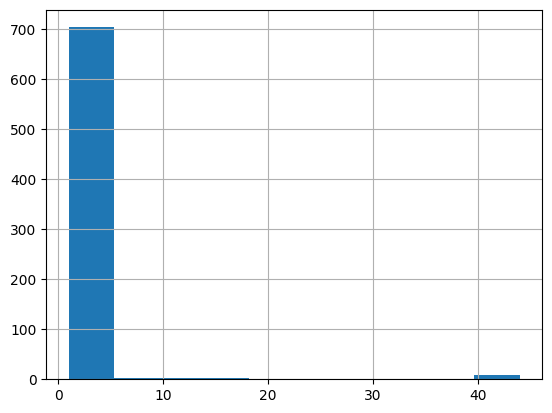

In [293]:
aggregated_similar_popularity.hist()

### Здесь представлено количетво записей с одинаковы id и popularity для каждого жанра. Как видно, у большого количества совпадают жанры.
### Это значит, что у многих записей отличаются только popularity. При этом все5 другие колонки (в том числе жанр) совпадают

In [294]:
data.query(f"track_id in {track_ids_with_similar_popularity}")["track_genre"].value_counts()

track_genre
reggae         91
reggaeton      90
latino         86
trance         77
rock           74
               ..
guitar          1
heavy-metal     1
salsa           1
mandopop        1
grunge          1
Name: count, Length: 94, dtype: int64

In [295]:
agg_funcs = {col: col for col in data.columns}


In [296]:
agg_funcs

{'track_id': 'track_id',
 'artists': 'artists',
 'album_name': 'album_name',
 'track_name': 'track_name',
 'popularity': 'popularity',
 'duration_ms': 'duration_ms',
 'explicit': 'explicit',
 'danceability': 'danceability',
 'energy': 'energy',
 'key': 'key',
 'loudness': 'loudness',
 'mode': 'mode',
 'speechiness': 'speechiness',
 'acousticness': 'acousticness',
 'instrumentalness': 'instrumentalness',
 'liveness': 'liveness',
 'valence': 'valence',
 'tempo': 'tempo',
 'time_signature': 'time_signature',
 'track_genre': 'track_genre'}

## Объеденим строки у которых отличается жанр. Теперь жанры будут перечисляться через ';'

In [297]:
new_data = {column_name: [] for column_name in data.columns}

In [298]:
for track_id, tracks_series in tqdm(trackid_to_tracks.items()):
    genres = []
    for track in tracks_series:
        genres.append(track["track_genre"])
    str_genres = ";".join(genres)
    for track in tracks_series:
        for column_name in data.columns:
            new_data[column_name].append(track[column_name])
        new_data["track_genre"][-1] = str_genres
    

100%|██████████| 89740/89740 [00:06<00:00, 12955.68it/s]


In [299]:
data

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


## Удалим дубликаты, после объединения строк у которых отличается только жанр
## Более 20000 строк в данных оказались дубликатами

In [300]:
data = pd.DataFrame.from_dict(new_data).drop_duplicates()

In [301]:
data

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic;j-pop;singer-songwriter;songwriter
4,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic;chill
6,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
7,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
8,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113544,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113545,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113546,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113547,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [302]:
data["track_genre"].value_counts()

track_genre
tango                                          999
study                                          998
sleep                                          997
idm                                            990
comedy                                         989
                                              ... 
deep-house;house;progressive-house               1
hardcore;metalcore;trance                        1
deep-house;edm;house;turkish                     1
deep-house;edm;electro;house                     1
acoustic;j-pop;singer-songwriter;songwriter      1
Name: count, Length: 1432, dtype: int64

In [303]:
data

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic;j-pop;singer-songwriter;songwriter
4,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic;chill
6,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
7,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
8,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113544,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113545,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113546,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113547,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [304]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90460 entries, 0 to 113548
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          90460 non-null  object 
 1   artists           90460 non-null  object 
 2   album_name        90460 non-null  object 
 3   track_name        90460 non-null  object 
 4   popularity        90460 non-null  int64  
 5   duration_ms       90460 non-null  int64  
 6   explicit          90460 non-null  bool   
 7   danceability      90460 non-null  float64
 8   energy            90460 non-null  float64
 9   key               90460 non-null  int64  
 10  loudness          90460 non-null  float64
 11  mode              90460 non-null  int64  
 12  speechiness       90460 non-null  float64
 13  acousticness      90460 non-null  float64
 14  instrumentalness  90460 non-null  float64
 15  liveness          90460 non-null  float64
 16  valence           90460 non-null  float64
 1

In [305]:
num_cols = [column_name for column_name in data.columns if  data[column_name].dtype != object]
num_cols

['popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

# Рассмотрим распределение переменных

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, bin

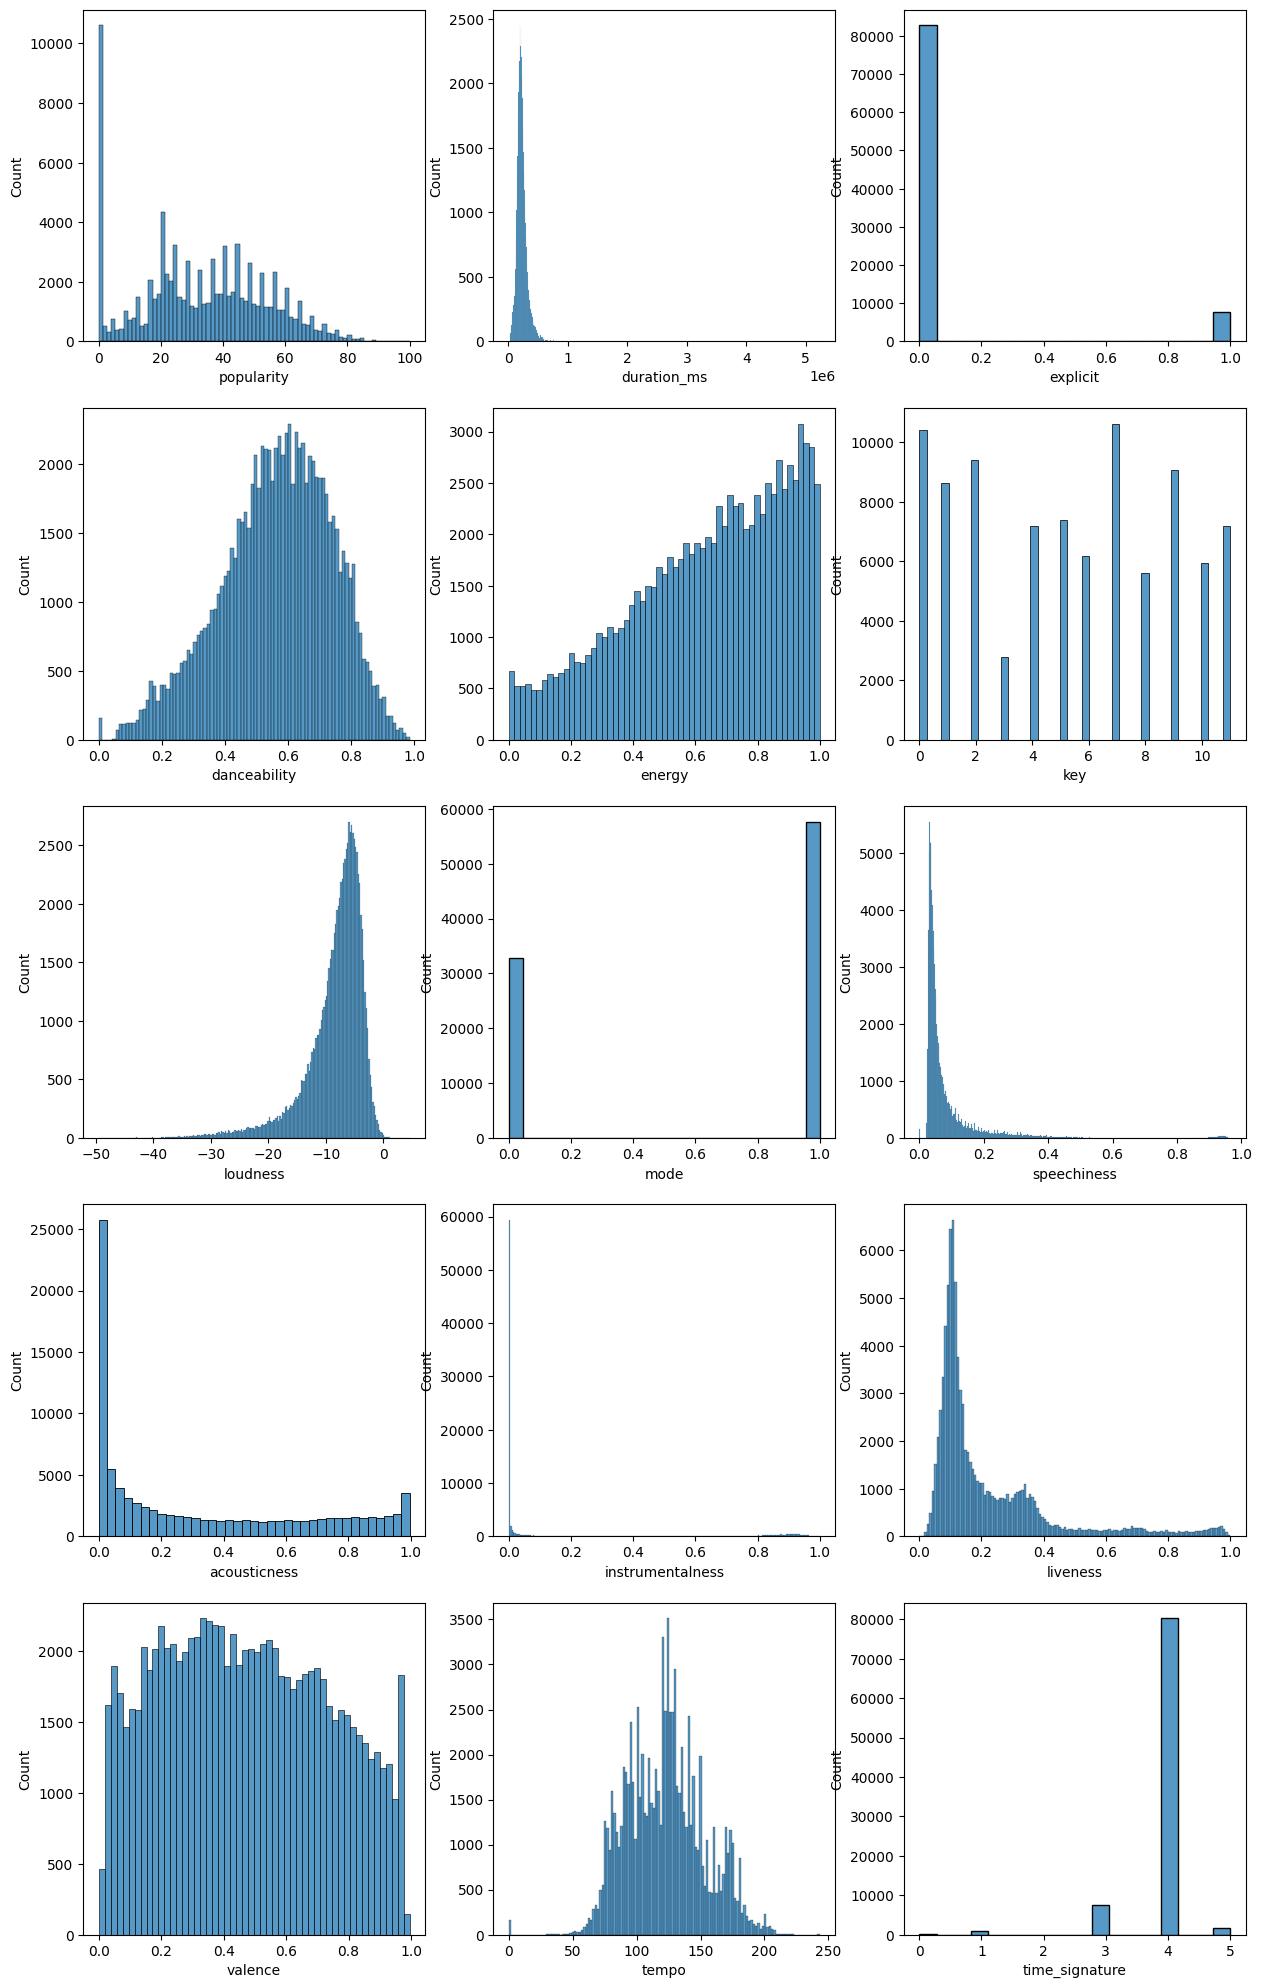

In [306]:
n_cols = len(num_cols)
n_rows = int(np.ceil(n_cols / 3))

fig, ax = plt.subplots(n_rows, 3, figsize=(15, n_rows*5))
for i, col in enumerate(num_cols):
    sns.histplot(data[col], ax=ax[i // 3, i % 3])

<Axes: >

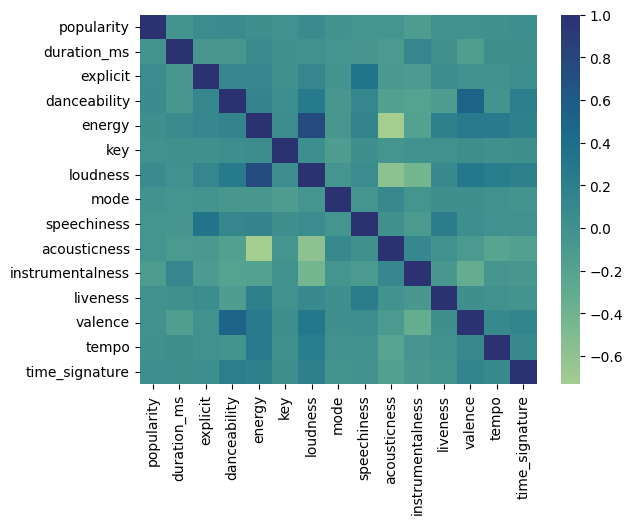

In [307]:
sns.heatmap(data[num_cols].corr(), cmap="crest")

In [308]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split

## Удалим колонки c id, и с именами трека и альбома. Их не имеет смысла кодировать.

In [309]:
data = data.drop(columns=["track_id", "album_name", "track_name"])

## Как было описано ранее, треки с несколькими жанрами в датасете представлены дубликатами. То есть строки полностью идентичны (даже id), отличаются только жанры
### Столбец с жанрами уже представлен как пречисление чере ";" всех жанров для трека. Закодируем список жанров для каждого трека в виде вектора

In [326]:
data['track_genre'] = data['track_genre'].apply(lambda x: x.split(';'))


In [327]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
coded_genres = mlb.fit_transform(data['track_genre'])

In [330]:
categorical_cols = data.select_dtypes(include=['object', "category"]).columns
label_encoders = {}
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [331]:
genres_data = pd.DataFrame(coded_genres, columns=mlb.classes_)


In [333]:
data = pd.concat([data, genres_data], axis=1)


In [334]:
data = data.drop(columns=["track_genre"])

In [335]:
data.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key',
       ...
       'spanish', 'study', 'swedish', 'synth-pop', 'tango', 'techno', 'trance',
       'trip-hop', 'turkish', 'world-music'],
      dtype='object', length=133)

In [336]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113345
Columns: 133 entries, track_id to world-music
dtypes: float64(132), object(1)
memory usage: 116.5+ MB


## Разделим датасет на тренеровочную и тестовую выборку

In [338]:
X = data.drop(columns=["popularity"])
y = data['popularity']

In [339]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


## Обучим 3 разных модели и сравним их результаты.
### Слуайный лес, линейную регрессию и полносвязную нейронную сеть.

In [340]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [341]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [342]:
preds = rf.predict(X_test)
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)
print(
    f"""
    MSE -> {mse}
    MAE -> {mae}
    r2 -> {r2}
    """)


    MSE -> 191.75551988551297
    MAE -> 10.272844561867018
    r2 -> 0.61750177869136
    


In [343]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

scaler = StandardScaler()

data = scaler.fit_transform(data)

In [344]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [345]:
preds = linear_model.predict(X_test)
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)
print(
    f"""
    MSE -> {mse}
    MAE -> {mae}
    r2 -> {r2}
    """)


    MSE -> 487.054500542347
    MAE -> 18.4239591739095
    r2 -> 0.028463533936107455
    


In [346]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [347]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='relu'))

metrics = ['mae', 'root_mean_squared_error', 'mape', 'r2_score']
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'root_mean_squared_error', "r2_score"])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [348]:
callback = EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=1
)

In [349]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=50, 
                    validation_split=0.2, 
                    batch_size=128,
                    verbose=1, 
                    callbacks=[callback]
                   )

Epoch 1/50
639/639 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 99702.3125 - mae: 45.9922 - r2_score: -195.5237 - root_mean_squared_error: 277.5090 - val_loss: 1617.2539 - val_mae: 33.4390 - val_r2_score: -2.2404 - val_root_mean_squared_error: 40.2151
Epoch 2/50
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5565.0444 - mae: 34.4001 - r2_score: -10.2010 - root_mean_squared_error: 69.4076 - val_loss: 1617.2539 - val_mae: 33.4390 - val_r2_score: -2.2404 - val_root_mean_squared_error: 40.2151
Epoch 3/50
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1692.6218 - mae: 33.4578 - r2_score: -2.4111 - root_mean_squared_error: 41.1367 - val_loss: 1617.2539 - val_mae: 33.4390 - val_r2_score: -2.2404 - val_root_mean_squared_error: 40.2151
Epoch 4/50
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1696.3116 - mae: 33.3746 - r2_score: -2.4344 - root_mean_squared_error: 41.1806 - val_loss: 1617.2539 - val_mae: 33.4390 - val_r2_score: -2.2404 - val_root_mean_squared_error: 40.2151
Epoch 5/50
639/639 

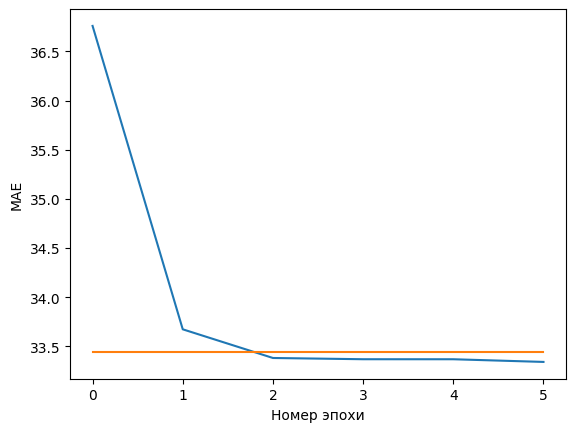

In [350]:
plt.plot(history.history['mae'], 
         label='MAE на train датасете')
plt.plot(history.history['val_mae'], 
         label='MAE на валидационном датаесете')
plt.xlabel('Номер эпохи')
plt.ylabel('MAE')
plt.show()

In [351]:
model.evaluate(X_test, y_test)

355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1593.2672 - mae: 33.0892 - r2_score: -2.1994 - root_mean_squared_error: 39.9138


[1605.606201171875, 33.230735778808594, 40.07001495361328, -2.2027292251586914]

In [356]:
rf.feature_importances_

array([0.04032458, 0.06918235, 0.1291916 , 0.07054736, 0.06255997,
       0.00461014, 0.05948517, 0.05015772, 0.0218422 , 0.05359039,
       0.00492532, 0.05089962, 0.06166847, 0.04168949, 0.04552391,
       0.05177998, 0.04896148, 0.00358969, 0.12947058])

# Выводы

### Из-за того, что модели обучаются довольно долго, и из-за особенностей обучения нейронной сети с примением early stopping я не стал применять кросс валидацию.
### Данные имеют много выбросов, распределени я сильно скошены. Также переменные имеют очень слабую кореляцию с целевой переменной. В связи с эти, ожидаемо, линейная регрессия показала плохие метрики.
### Нейронная сеть также показала плохие метрики на предсказании. 
### Самая лучшая модель - случайный лес. При оценке, модель показала 0.61 R^2, что является довольно неплохим результатом. RandomForest, который хорошо выделяет нелинейные зависимости в табличных данных, хорошо выделила закономерности. При этом, как видно из простотра важности пременных, нельзя выделить какой-то одной конкретной переменной, которая бы сама по себе очень сильно влияла на предсказание. 
